**Проект по физике**
---

Моделирование движения двух взаимодействующих точечных диполей с заданными электрическими дипольными моментами (ЭДМ), массами и моментами инерции.

**Задание для вычислительного эксперимента:**
Построить траектории движения диполей для следующих начальных условий:

а) ЭДМ параллельны друг другу и направлены
под углом 45° к линии диполей;

б) ЭДМ антипараллельны друг другу и
направлены под углом 45° к линии диполей;

In [10]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Константы
k = 10  # Постоянная, регулирующая силу взаимодействия (можно изменить)

# Параметры диполей
p1_mag = 1.0  # Величина дипольного момента первого диполя
p2_mag = 1.0  # Величина дипольного момента второго диполя
m1 = 1.0      # Масса первого диполя
m2 = 1.0      # Масса второго диполя
I1 = 1.0      # Момент инерции первого диполя (для вращения)
I2 = 1.0      # Момент инерции второго диполя (для вращения)

# Начальные условия (можно изменять)
dt = 0.01    # Шаг по времени
t_end = 35   # Конец моделирования
r1_0 = np.array([0.0, 0.0])  # Начальное положение первого диполя
r2_0 = np.array([1.0, 0.0])   # Начальное положение второго диполя
theta1_0 = np.radians(45)   # Начальный угол ориентации первого диполя
theta2_0 = np.radians(45)   # Начальный угол ориентации второго диполя
#Для антипараллельных диполей (задание б) изменить theta2_0 на np.radians(45 + 180)
v1_0 = np.array([0.0, 0.0]) #Начальная скорость первого диполя
v2_0 = np.array([0.0, 0.0]) #Начальная скорость второго диполя
omega1_0 = 0.0 # Начальная угловая скорость первого диполя
omega2_0 = 0.0 # Начальная угловая скорость второго диполя

**Зависимость от параметров:**



*   k: Увеличение k (постоянная взаимодействия) увеличивает силу взаимодействия, что приводит к более быстрому движению и, возможно, к нестабильности моделирования (если k слишком велико).
*   Начальное расстояние: Большее начальное расстояние означает, что взаимодействие будет слабее, и диполи будут двигаться медленнее.

*   Начальный угол: Изменение начального угла повлияет на начальное направление движения диполей.







In [12]:
# Функция для расчета силы взаимодействия
def dipole_force(r1, r2, theta1, theta2, p1_mag, p2_mag):
    r = r2 - r1
    r_mag = np.linalg.norm(r)
    r_unit = r / r_mag
    force_mag = (3 * k * p1_mag * p2_mag / r_mag**4) * (np.cos(theta1) * np.cos(theta2) - 0.5 * np.sin(theta1) * np.sin(theta2)) # Упрощенная формула для 2D
    force = force_mag * r_unit
    return force


In [13]:
# Моделирование
t = np.arange(0, t_end, dt)
r1 = np.zeros((len(t), 2))
r2 = np.zeros((len(t), 2))
theta1 = np.zeros(len(t))
theta2 = np.zeros(len(t))
v1 = np.zeros((len(t),2))
v2 = np.zeros((len(t),2))
omega1 = np.zeros(len(t))
omega2 = np.zeros(len(t))


r1[0] = r1_0
r2[0] = r2_0
theta1[0] = theta1_0
theta2[0] = theta2_0
v1[0] = v1_0
v2[0] = v2_0
omega1[0] = omega1_0
omega2[0] = omega2_0

for i in range(len(t) - 1):
    force = dipole_force(r1[i], r2[i], theta1[i], theta2[i], p1_mag, p2_mag)
    a1 = -force / m1  # Ускорение первого диполя
    a2 = force / m2   # Ускорение второго диполя
    v1[i+1] = v1[i] + a1 * dt
    v2[i+1] = v2[i] + a2 * dt
    r1[i+1] = r1[i] + v1[i+1] * dt
    r2[i+1] = r2[i] + v2[i+1] * dt
    #Обновляем углы (упрощенная модель вращения)
    theta1[i+1] = theta1[i] + omega1[i] * dt
    theta2[i+1] = theta2[i] + omega2[i] * dt

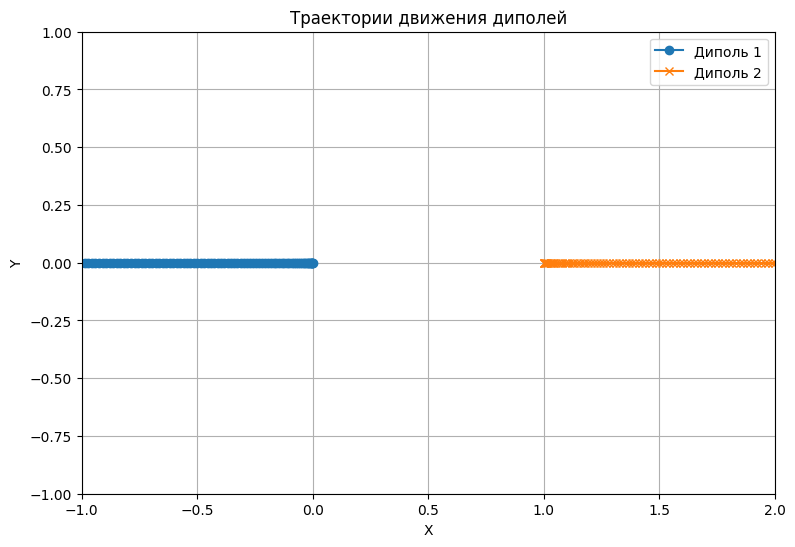

In [14]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(r1[:, 0], r1[:, 1], label='Диполь 1', marker='o', linestyle='-')
plt.plot(r2[:, 0], r2[:, 1], label='Диполь 2', marker='x', linestyle='-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Траектории движения диполей')
plt.legend()
plt.grid(True)
plt.xlim([-1,2]) # Устанавливаем границы для оси X
plt.ylim([-1,1]) # Устанавливаем границы для оси Y
plt.gca().set_aspect('equal', adjustable='box') # Делаем оси равномерными
plt.show()

**а) Параллельные диполи (угол 45 градусов):**

*  Ожидаемое поведение: Диполи будут отталкиваться друг от друга. Поскольку их дипольные моменты параллельны, проекция вектора дипольного момента на вектор расстояния между диполями будет положительной, что соответствует отталкиванию.

*  Траектория: Диполи будут двигаться в противоположных направлениях вдоль линии, приблизительно перпендикулярной к начальной линии, соединяющей их центры. Они не будут двигаться строго прямолинейно, поскольку сила взаимодействия меняется с расстоянием. Влияние начального угла в 45 градусов будет в том, что движение будет сочетанием радиального движения и движения вдоль начальной линии.

**б) Антипараллельные диполи (угол 45 градусов):**

*  Ожидаемое поведение: Диполи будут притягиваться друг к другу. Проекция одного дипольного момента на вектор расстояния будет положительной, а другого — отрицательной, что приводит к притяжению.

*  Траектория: Диполи будут двигаться навстречу друг другу. Сближение будет происходить по спиралевидной траектории, если мы учтем вращательные движения. Если вращение не учитывается (как в упрощенной модели), траектории будут приближаться по кривой к точке столкновения.

